# Green-Kubo friction coefficient


### A bit of background

The Green--Kubo formula for the effective friction coefficient is

\begin{equation}
    \lambda_{\mathrm{eff}} = \frac{\beta}{\mathcal{A}}\int^\infty_0 \mathrm{d}t\, \langle F_x(t) F_x(0)\rangle_{\mathrm{c}},
\end{equation} 
where $\beta=1/(k_{\mathrm{B}}T)$, $k_{\mathrm{B}}$ is Boltzmann's constant, $T$ is the temperature, $\mathcal{A}$ is the interfacial area, $F_x$ is the total tangential force on the liquid and $\langle\cdots\rangle_{\mathrm{c}}$ denotes a canonical average over the constrained system. The constraint applied is one that conserve the momentum of the fluid in the direction of interest at zero, i.e. $P_x =0$.

In the case of 2D channel like in our example, we can average over the $x$ and $y$ directions as follows:
\begin{equation}
   \lambda^{\mathrm{2D}}_{\mathrm{eff}} =   \frac{\beta}{2\mathcal{A}}\int^\infty_0\!\mathrm{d}t\,\langle \boldsymbol{F}_{\parallel}(t) \cdot \boldsymbol{F}_{\parallel}(0) \rangle_{\mathrm{c}},
\end{equation}
from an EMD simulation with a constraint keeping
 the liquid linear momentum zero 
 in the in-plane $(x,y)$ directions, 
 and $\boldsymbol{F}_{\parallel}=(F_x,F_y)$ denotes 
 the in-plane lateral force on the liquid.



 ### Compute from constrained EMD simulations

 Here we use the script provided on the summed forces obtained from the constrained simulation. The 5 ns trajectory provided is split into 500 blocks to obtain a statistical error.

In [1]:
script_path = "../scripts/compute_friction_GK.py"
compressed_input_file = "../simulations/constrained/summed_forces.out.gz"
input_file = "../simulations/constrained/summed_forces.out"
data_file = "../simulations/constrained/fluid_solid.data"
nblock = 500
output_file = "friction_GK_constrained.txt"

!gunzip -c {compressed_input_file} > {input_file}
!python3 {script_path} -in {input_file} -out {output_file} -nblock {nblock} -data {data_file} 

100%|██████████████████████████████| 5000000/5000000 [02:17<00:00, 36385.65it/s]


Prepare conversion factors and plotting styles

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec



params = {"axes.labelsize": 14,
          "axes.titlesize": 16,}
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['mathtext.bf'] = 'STIXGeneral:italic:bold'
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 150

def place(ax):
  ax.tick_params(direction="in", which="minor", length=3)
  ax.tick_params(direction="in", which="major", length=5, labelsize=12)
  ax.grid(which="major", ls="dashed", dashes=(1, 3), lw=0.5, zorder=0)
  

# Constants
kcal_to_joules = 4184  
avogadro_number = 6.022e23  
angstrom_to_meters = 1e-10  
joules_to_nN_meters = 1e9  

conversion_factor_kcal_per_mol_A_to_nN = (kcal_to_joules / avogadro_number) * joules_to_nN_meters / angstrom_to_meters

conversion_for_force_force = conversion_factor_kcal_per_mol_A_to_nN**2
conversion_for_friction = 1e-6 # put power of 6 in unit
converstion_for_time = 1e-3 # fs to ps

def get_friction(path_to_data):
    
    data = pd.read_csv(path_to_data, skiprows=1, header=None, delim_whitespace=True).to_numpy()
    
    time         = data[:, 0] * converstion_for_time
    ff           = data[:, 1] * conversion_for_force_force
    ff_err       = data[:, 2] * conversion_for_force_force
    friction     = data[:, 3] * conversion_for_friction
    friction_err = data[:, 4] * conversion_for_friction
    
    return time, ff, ff_err, friction, friction_err, 



Let's look at the force autocorrelation function and the Green--Kubo integral. The effective friction is given as the plateau value at $\tau\to\infty$.

lambda_eff =  1.3950767291069999  +/-  0.174546505046  10^6 N s m^{-2}


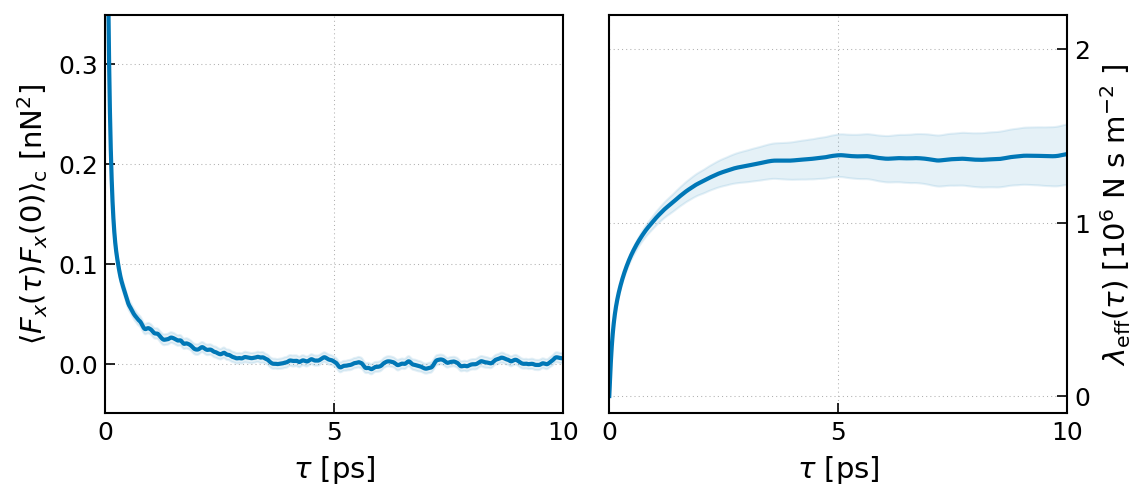

In [3]:

fig = plt.figure(figsize=(8, 3.5))

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])


t, ff, ff_err, friction, err = get_friction('friction_GK_constrained.txt')


ax0.plot(t, ff,color='#0077b6', lw=2)
ax0.fill_between(t,ff - ff_err,ff + ff_err,alpha=0.1,zorder=2, color='#0077b6')
ax1.plot(t, friction,color='#0077b6',lw=2)
ax1.fill_between(t,friction - err,friction + err,alpha=0.1,zorder=2, color='#0077b6')


ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax0.xaxis.set_major_locator(ticker.MultipleLocator(5))


ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()


ax0.set_xlim(0,10)
ax0.set_ylim(-0.05,0.35)
ax1.set_xlim(0,10)
ax1.set_ylim(-0.1,2.2)


place(ax0)
place(ax1)
ax0.set_ylabel(r"$\langle  F_x(\tau)  F_x(0) \rangle_{\mathrm{c}}$ [nN$^2$]")
ax1.set_ylabel(r"$\lambda_{\mathrm{eff}}(\tau)$ [$10^6$ N s m$^{-2}$ ]")

ax1.set_xlabel(r"$\tau$ [ps]")
ax0.set_xlabel(r"$\tau$ [ps]")

plt.tight_layout()

print("lambda_eff = ", friction[-1], " +/- ", err[-1], " 10^6 N s m^{-2}")


 ### What if we don't constrain the system and run "real dynamics"


In this case the Green--Kubo formula would become 

\begin{equation}
    \lambda = \frac{\beta}{\mathcal{A}}\int^\infty_0 \mathrm{d}t\, \langle F_x(t) F_x(0)\rangle,
\end{equation}

where  $\langle\cdots\rangle$ denotes a canonical average over the unconstrained system.




Here we use the script provided on the summed forces obtained from the unconstrained EMD simulation. Again, the 5 ns trajectory provided is split into 500 blocks to obtain a statistical error.

In [4]:
script_path = "../scripts/compute_friction_GK.py"
compressed_input_file = "../simulations/real/summed_forces.out.gz"
input_file = "../simulations/real/summed_forces.out"
data_file = "../simulations/real/fluid_solid.data"
nblock = 500
output_file = "friction_GK_real.txt"

!gunzip -c {compressed_input_file} > {input_file}
!python3 {script_path} -in {input_file} -out {output_file} -nblock {nblock} -data {data_file} 

100%|██████████████████████████████| 5000000/5000000 [02:27<00:00, 33987.84it/s]


Let's plot them together

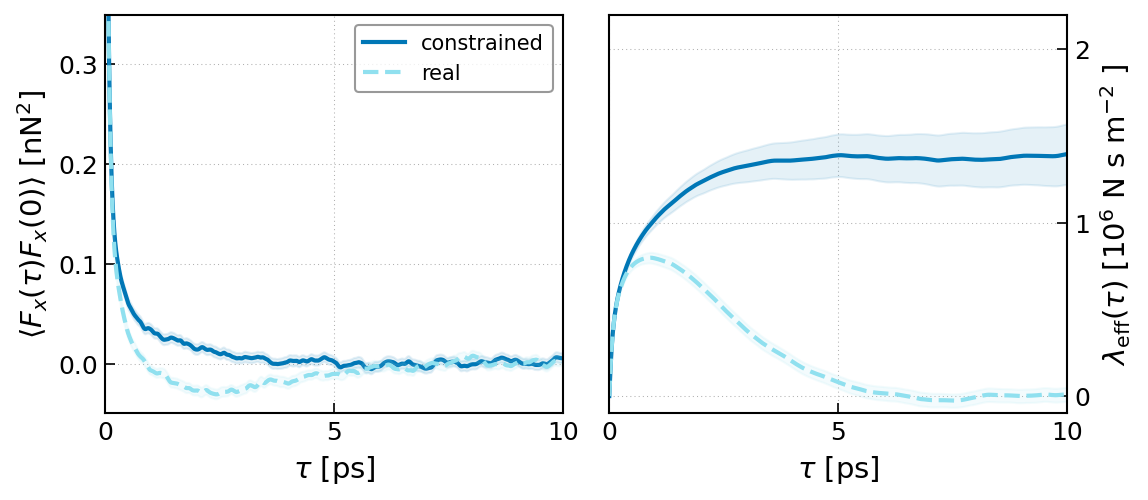

In [5]:

fig = plt.figure(figsize=(8, 3.5))

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])



t, ff, ff_err, friction, err = get_friction('friction_GK_constrained.txt')

ax0.plot(t, ff,color='#0077b6', lw=2, label=r'constrained')
ax0.fill_between(t,ff - ff_err,ff + ff_err,alpha=0.1,zorder=2, color='#0077b6')
ax1.plot(t, friction,color='#0077b6',lw=2)
ax1.fill_between(t,friction - err,friction + err,alpha=0.1,zorder=2, color='#0077b6')


t, ff, ff_err, friction, err = get_friction('friction_GK_real.txt')

ax0.plot(t, ff,color='#90e0ef',ls='--', lw=2, label=r'real')
ax0.fill_between(t,ff - ff_err,ff + ff_err,alpha=0.1,zorder=2, color='#90e0ef')
ax1.plot(t, friction, ls='--', color='#90e0ef',lw=2)
ax1.fill_between(t,friction - err,friction + err,alpha=0.1,zorder=2, color='#90e0ef')


ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax0.xaxis.set_major_locator(ticker.MultipleLocator(5))


ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()


ax0.set_xlim(0,10)
ax0.set_ylim(-0.05,0.35)
ax1.set_xlim(0,10)
ax1.set_ylim(-0.1,2.2)
ax0.legend(frameon=True, loc="upper right", fontsize=10,edgecolor="gray")


place(ax0)
place(ax1)
ax0.set_ylabel(r"$\langle  F_x(\tau)  F_x(0) \rangle$ [nN$^2$]")
ax1.set_ylabel(r"$\lambda_{\mathrm{eff}}(\tau)$ [$10^6$ N s m$^{-2}$ ]")

ax1.set_xlabel(r"$\tau$ [ps]")
ax0.set_xlabel(r"$\tau$ [ps]")

plt.tight_layout()

When real dynamics is used, the force autocorrelation function has a negative correlation, leading to its integral decaying to zero at long time. This is known as the "plateau problem".